In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [2]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [3]:
ProductionTank

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


In [4]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
import pandas as pd

Data = pd.DataFrame(ProductionTank)


In [6]:
Data.replace("STEP2_CONS", 
           "STEP2_CONS-Deaeration", 
           inplace=True)

In [7]:
print(Data[['Instruction_Step', 'Phase_start_delay']].isnull().sum())

Instruction_Step     25
Phase_start_delay     0
dtype: int64


In [8]:
filtered_data = Data[Data['Instruction_Step'] == 'STEP2_CONS-Deaeration']

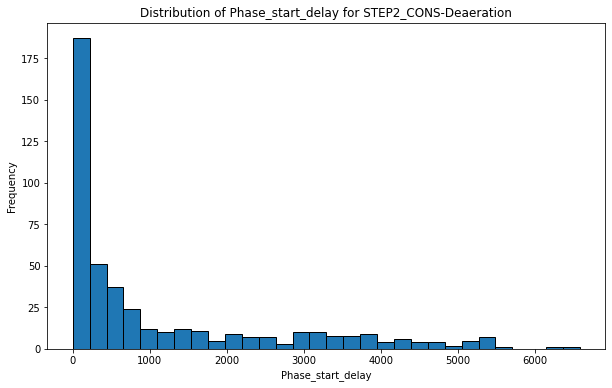

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Phase_start_delay'], bins=30, edgecolor='black')
plt.title('Distribution of Phase_start_delay for STEP2_CONS-Deaeration')
plt.xlabel('Phase_start_delay')
plt.ylabel('Frequency')
plt.show()

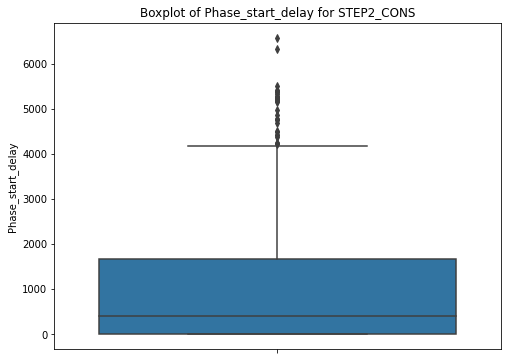

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_data['Phase_start_delay'])
plt.title('Boxplot of Phase_start_delay for STEP2_CONS')
plt.ylabel('Phase_start_delay')
plt.show()

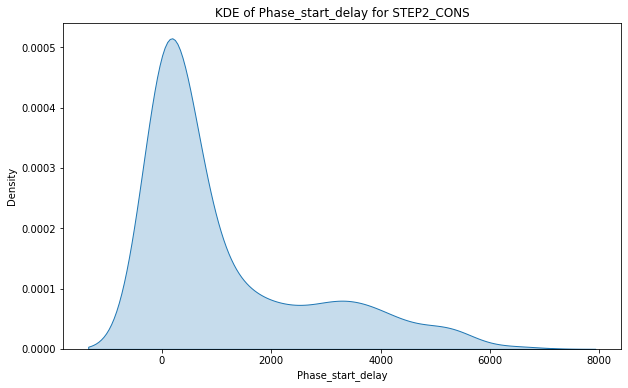

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_data['Phase_start_delay'], shade=True)
plt.title('KDE of Phase_start_delay for STEP2_CONS')
plt.xlabel('Phase_start_delay')
plt.show()

#### Exploring the different deaeration times ( start Phase delay duration) for each of the groups of productions tanks and their common materials 

#### Deaeration in  Production Tanks : '2202', '2203', '2204'

In [12]:
desired_steps = ['STEP2_CONS-Deaeration']
filtered_data = Data[Data['Instruction_Step'].isin(desired_steps)]

In [13]:
#tanks_in_group1 = ['2202', '2203', '2204']
#instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [14]:
# Calculate total phase duration for each desired instruction step for each tank and material
#total_durations = filtered_data.groupby(['Tank_1', 'Material', 'Instruction_Step'])['Phase_start_delay'].sum().reset_index()


In [15]:
#filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    #(Data['Instruction_Step'] == instruction_step_of_interest)]

In [16]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len('Tank_1'))['Material'].unique()

In [17]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]
#filtered_data

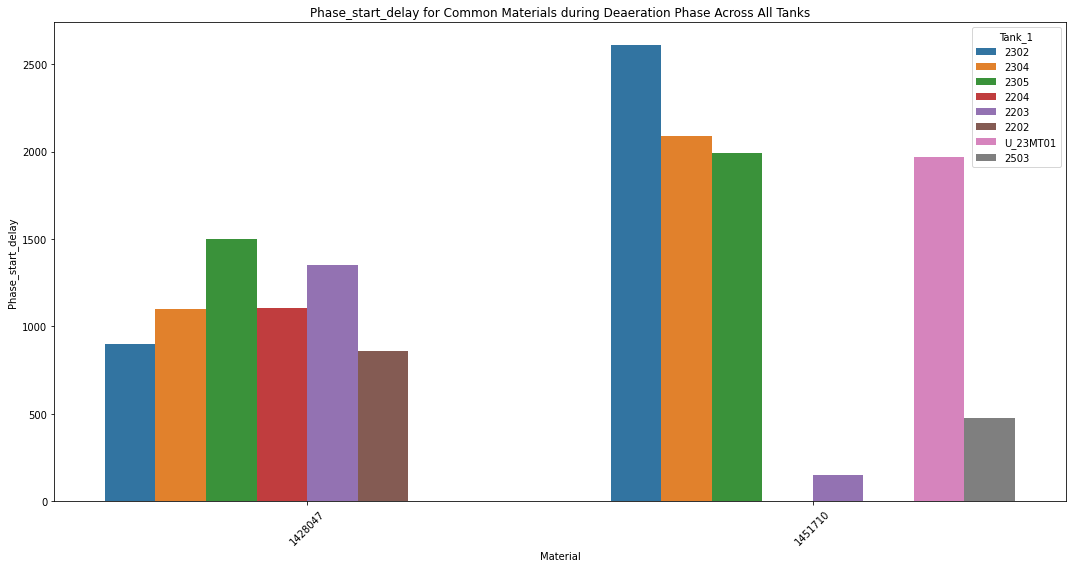

In [18]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across All Tanks')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Deaeration in  Production Tanks : '2202', '2203', '2204'

In [19]:
#desired_steps = ['STEP2_CONS-Deaeration']
#filtered_data1 = Data[Data['Instruction_Step'].isin(desired_steps)]

In [20]:
tanks_in_group1 = ['2202','2203','2204']
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [21]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [22]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [23]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]
#filtered_data

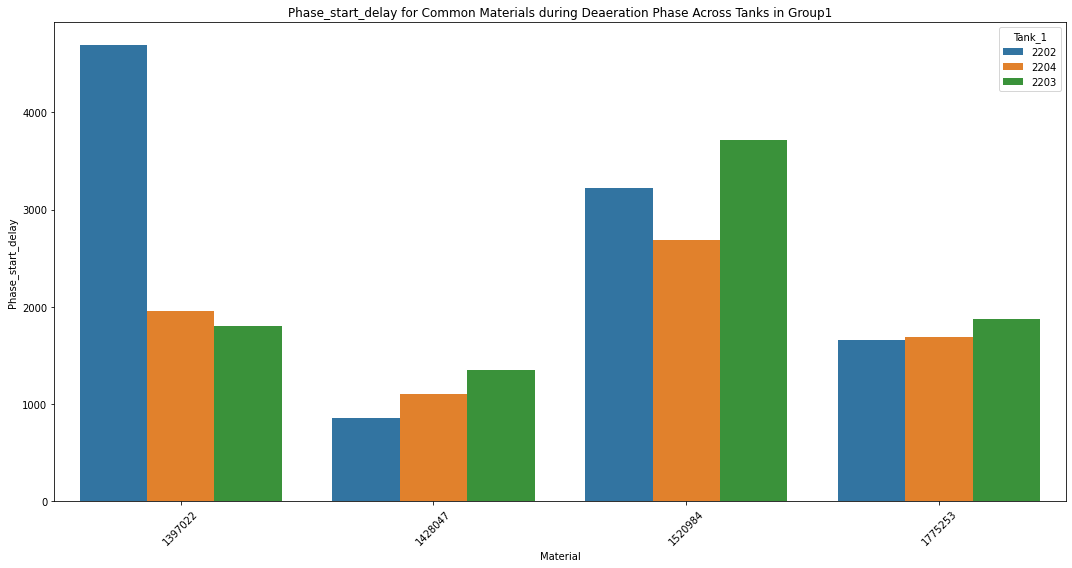

In [24]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
#### Deaeration in  Production Tanks  : '2302', '2304', '2305'

In [26]:
tanks_in_group1 = ['2302', '2304', '2305']
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [27]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [28]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [29]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

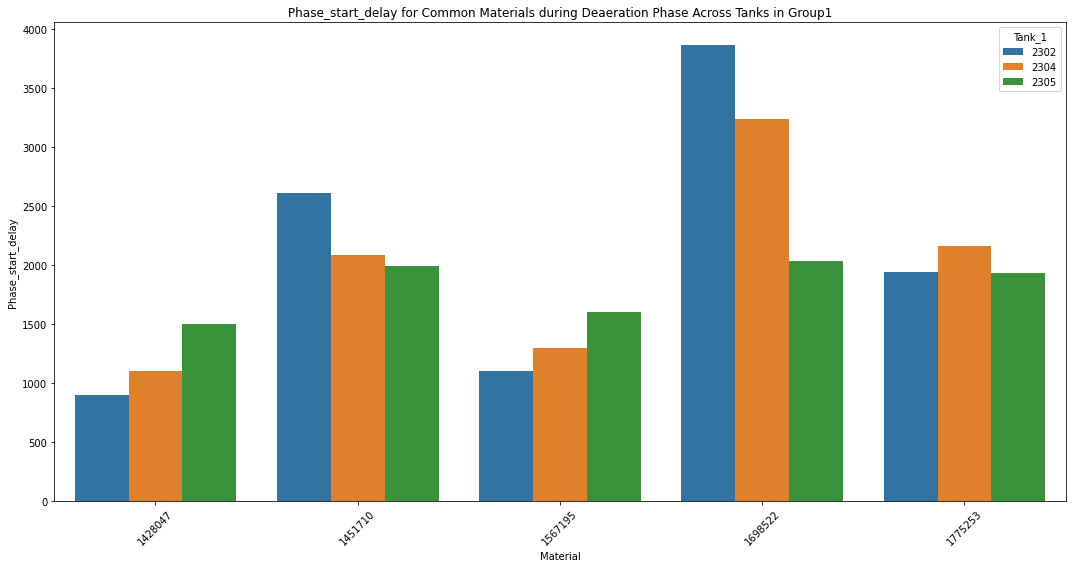

In [30]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
#### Production Tanks : '2501', '2502'

In [32]:
tanks_in_group1 = ['2501', '2502']
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [33]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [34]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [35]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

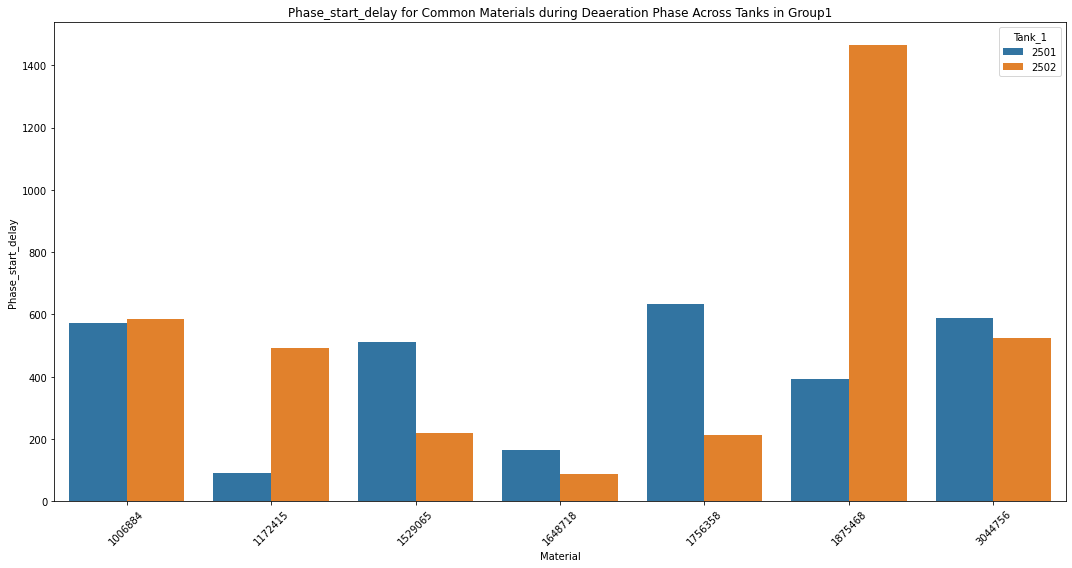

In [36]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
tanks_in_group1 = ['2503','2504']
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [38]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [39]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [40]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

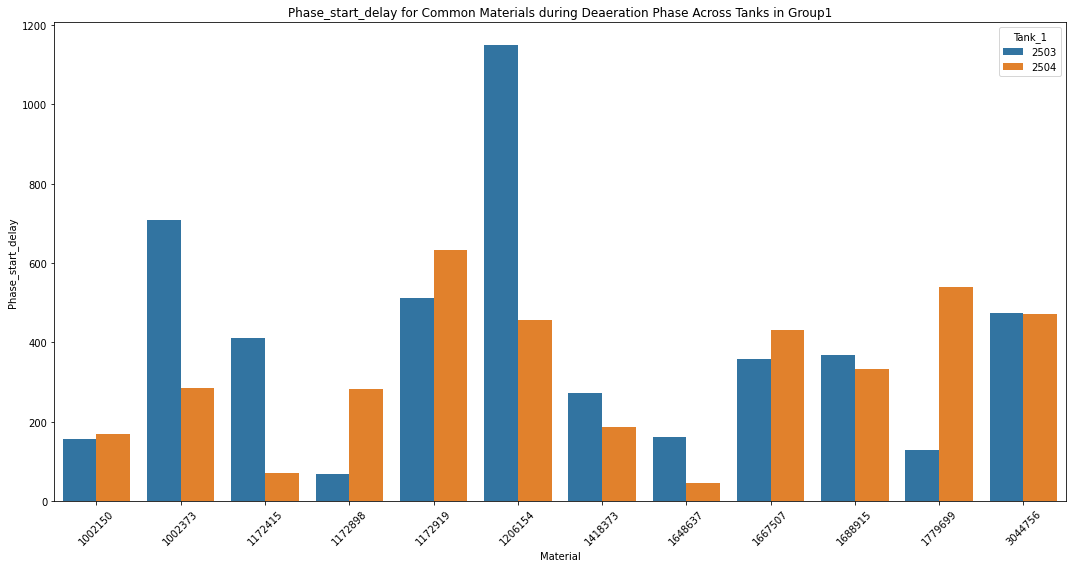

In [41]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
#ingredient_of_interest = ['1461896', '1254972','1031006','1243269','1196706','1815609']
#ingredient_data = data[data['INGRED_ID'] == ingredient_of_interest]

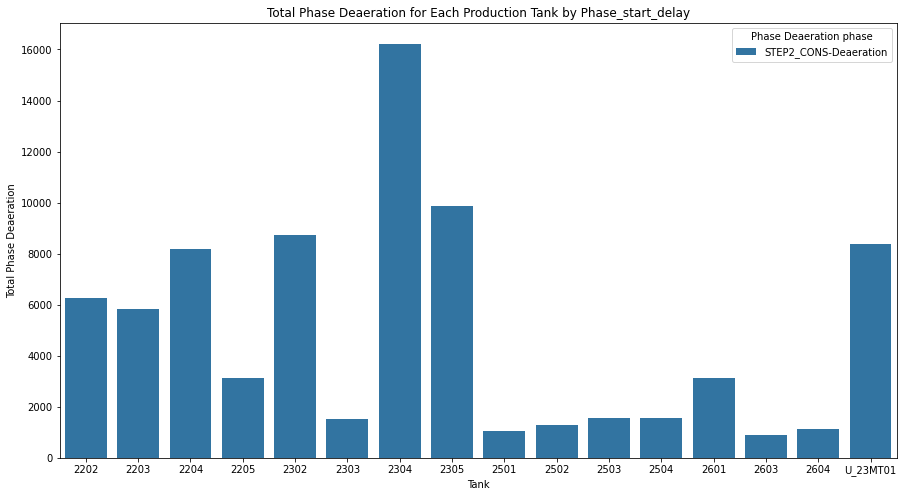

       Tank_1    BATCHID  Material  Phase_duration  Phase_overrun  \
0        2202  107867810   1648637              31           11.0   
1        2202  107899926   1775253              26            6.0   
2        2202  107956670   1397022              11            0.0   
3        2202  107963677   1775253              70           50.0   
4        2202  107964410   1775253              85           65.0   
..        ...        ...       ...             ...            ...   
305  U_23MT01  107781793   1698522              32            8.0   
306  U_23MT01  107787543   1520984              43           31.0   
307  U_23MT01  107833745   1775253              33           13.0   
308  U_23MT01  107856519   1451710              26            6.0   
309  U_23MT01  108067817   1775253             257          237.0   

     Phase_start_delay  Quantity  Flowrate_KGMIN  Target_Phase_duration  \
0                 2144    1303.0         86.2927                   10.0   
1                 217

In [43]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)

# 'STEP1_CONS - refers to the instruction step of the manual addition of ingredients to the production tank'
# Filter the dataframe for desired instruction steps
desired_steps = ['STEP2_CONS-Deaeration']
filtered_data = Data[Data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material', 'Instruction_Step'])['Phase_start_delay'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_start_delay', hue='Instruction_Step', ci=None)
plt.title('Total Phase Deaeration for Each Production Tank by Phase_start_delay')
plt.ylabel('Total Phase Deaeration')
plt.xlabel('Tank')
plt.legend(title='Phase Deaeration phase')
plt.show()

#Aggregate data per tank
aggregated_total_durations_df5 = filtered_data.groupby(['Tank_1','BATCHID','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()


print(aggregated_total_durations_df5)

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.DataFrame(aggregated_total_durations_df5)

# Calculate correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap')
plt.show()

NameError: name 'df' is not defined